In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_csv("/workspaces/Data-Analyst-Project-Portfolio/Netflix-WatchPattern-Analytics/data/netflix_cleaned.csv")

In [5]:
df['Date'] = pd.to_datetime(df['Watch_Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

In [6]:
print("Dataset shape:", df.shape)
display(df.head())

Dataset shape: (120, 14)


,User_ID,Video_Title,Genre,Watch_Date,Start_Time,Watch_Duration_Minutes,Total_Video_Duration,Device_Type,Completed,Date,Year,Month,Day,Weekday
0,user_16,Drama Movie 5,Drama,2024-02-05,18:45,96.83,128.30,Smart TV,No,2024-02-05,2024,February,5,Monday
1,user_13,Thriller Movie 4,Thriller,2024-04-08,06:34,60.87,68.73,Smart TV,Yes,2024-04-08,2024,April,8,Monday
2,user_11,Thriller Movie 5,Thriller,2024-02-21,06:49,34.88,92.27,Desktop,No,2024-02-21,2024,February,21,Wednesday
3,user_12,Drama Movie 5,Drama,2024-04-15,01:36,113.35,118.46,Laptop,Yes,2024-04-15,2024,April,15,Monday
4,user_18,Romance Movie 5,Romance,2024-05-12,03:15,36.07,92.33,Smart TV,No,2024-05-12,2024,May,12,Sunday


/tmp/ipykernel_3854/3233951121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette="Blues_d")


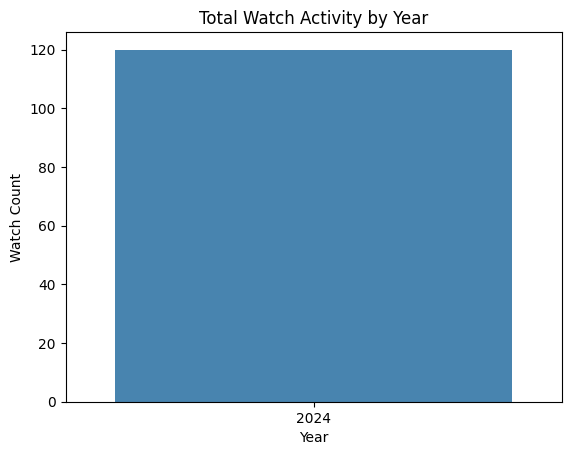

In [7]:
# Total watch counts per year
yearly_counts = df['Year'].value_counts().sort_index()
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette="Blues_d")
plt.title("Total Watch Activity by Year")
plt.xlabel("Year")
plt.ylabel("Watch Count")
plt.show()

/tmp/ipykernel_3854/1424699248.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="viridis")


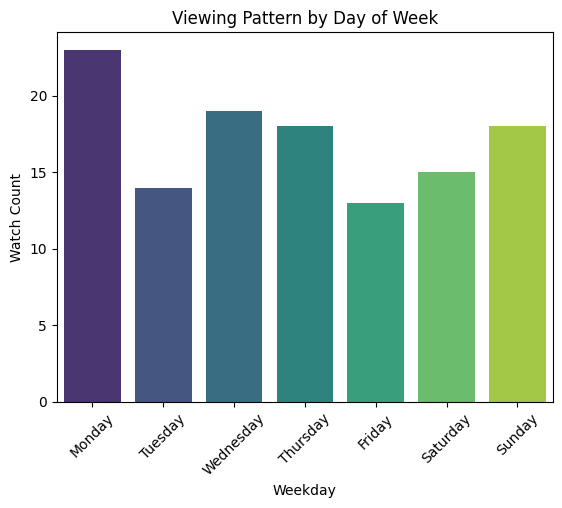

In [8]:
# Watch counts by weekday
weekday_counts = df['Weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="viridis")
plt.title("Viewing Pattern by Day of Week")
plt.xlabel("Weekday")
plt.ylabel("Watch Count")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_3854/787237663.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_titles.index, x=top_titles.values, palette="magma")


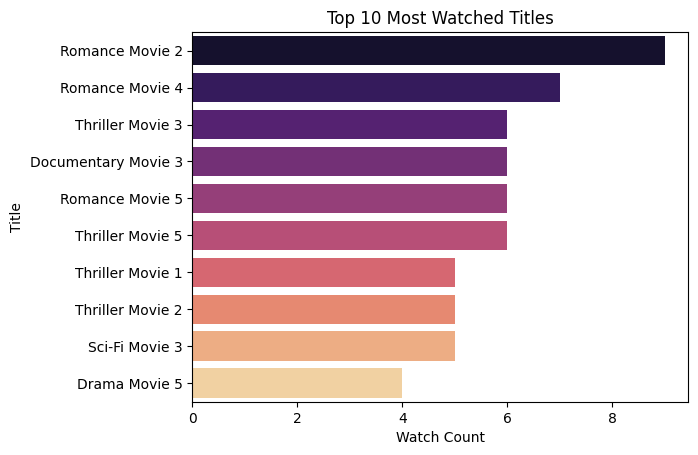

In [10]:
top_titles = df['Video_Title'].value_counts().head(10)
sns.barplot(y=top_titles.index, x=top_titles.values, palette="magma")
plt.title("Top 10 Most Watched Titles")
plt.xlabel("Watch Count")
plt.ylabel("Title")
plt.show()

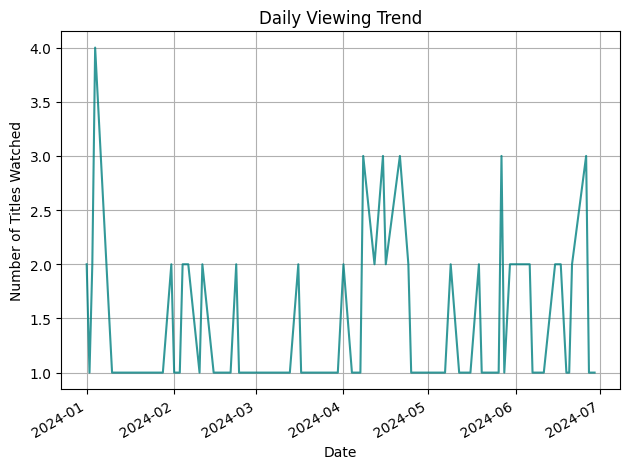

In [11]:
# Daily viewing trend
daily_view = df.groupby('Date').size()
daily_view.plot(kind='line', linewidth=1.5, alpha=0.8, color='teal')
plt.title("Daily Viewing Trend")
plt.xlabel("Date")
plt.ylabel("Number of Titles Watched")
plt.grid(True)
plt.tight_layout()
plt.show()

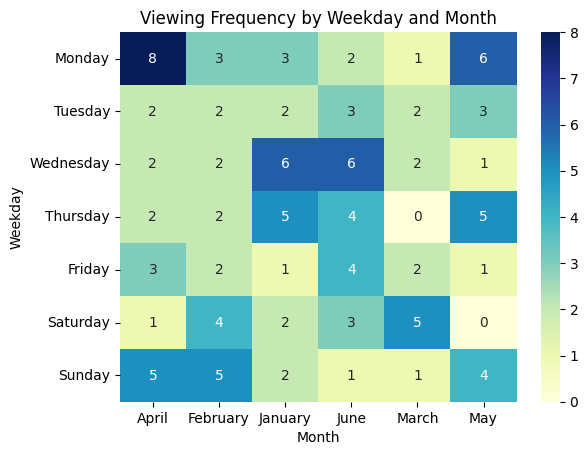

In [12]:
# Cross-tabulate viewing frequency
pivot_table = pd.crosstab(df['Weekday'], df['Month'])

# Ensure weekday order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(ordered_days)

sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Viewing Frequency by Weekday and Month")
plt.xlabel("Month")
plt.ylabel("Weekday")
plt.show()